# [GK] 10.10.1 Zeitreihenanalyse

## Python Cheatsheet
### Useful Pandas Tools

- Changing an index to datetime
  - `df.index = pd.to_datetime(df.index)`
- Plotting data
  - `df.plot(grid=True)`
- Slicing data
  - `df['2002']`
- Join two Dataframes
  - `df1.join(df2)`
- Resample data(e.g. from daily to weekly)
  - `df = df.resample(rule='W').last()`
- Computing percent changes and differences of a time series
  - `df['col'].pct_change()`
  - `df['col'].diff()`
- correlation method of Series
  - `df['ABC'].corr(df['XYZ])`
- autocorrelation
  - `df['ABC'].autocorr()`

### Calculate Correlation

#### Calculate percentage changes of both series
`df['a_Ret']=df['a_Prices'].pct_change()
df['b_Ret']=df['b_Prices'].pct_change()
`
`changes = levels.pct_change()`

#### Visualize with Scatter Plot
`plt.scatter(df['a_Ret'], df['b_Ret'])
plt.show()`

#### Calcualte the Correlation
`correlation=df['a_Ret'].corr(df[b_Ret])
print(correlation)`

### Simple linear Regression

y=a+b*x+e

#### Calculating it with statsmodels

import statsmodels.api as sm

`df['a_Ret']=df['a_Prices'].pct_change()
df['b_Ret']=df['b_Prices'].pct_change()`

#### Add a constant to the DataFrame for the regression intercept
`df1 = sm.add_constant(df)`

or 

`dfx1 = sm.add_constant(dfx)`

#### Delete the row of NaN
`df = df.dropna()`

#### Run the regression
`results=sm.OLS(df['R2000_Ret'],df[['const', 'SPX']]).fit()
print(results.summary())`

or

`result = sm.OLS(y, dfx1).fit()`

#### R_squared
`[corr(x,y)]^2=R^2
sign(corr)=sign(regression slope)`

### Autocorrelation

![Autocorrelation](img/Autoc.png)

#### Plot ACF
`from statsmodels.graphics.tsaplots import plot_acf`
`plot_acf(x, lags=20, alpha=0.05)`

#### ACF values
`from statsmodels.tsa.stattools import acf`
`print(acf(x))`

### White Noise
White Noise is a series with
  - Constant Mean
  - Constant variance
  - Zero autocorrelations at all lags

#### Generate White Noise
`import numpy as np
noise = np.random.normal(loc=0, scale=1, size=500) `

### Random Walk
Todays Price = Yesterdays Price + Noise
Pt=P_(t-1)+e_t

#### Different methods

![Random walk](img/RandomWalk.png)

#### Test if a stock market follows a Random Walk

![Test Random Walk](img/TestRandomWalk.png)

#### Dickey-Fuller Test

![Dicker Fuller](img/DickeyFuller.png)

#### Augmented Dickey-Fuller Test in Python
`from statsmodels.tsa.stattools import adfuller`
`adfuller(x)`

#### Random Walk with drift
```
# Generate 500 random steps
steps = np.random.normal(loc=0.001, scale=0.01, size=500) + 1

# Set first element to 1
steps[0]=1

# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show()
```

## Zeitreihen - Aufgabe

Agenda:

- Stelle den Verlauf des Eröffnungskurses (open), höchsten Tageskurses (high), niedrigsten Tageskurses (low) und Börsenschlusskurses (close) graphisch dar. Beschreibe, was dabei auffällt und wie diese Zeitreihen zusammenhängen.

- Modelliere den Rolling Mean = Moving Average jeder dieser 4 Zeitreihen und stelle diese graphisch jeweils in Kombination mit der ursprünglichen Zeitreihe dar.

- Stelle die Autokorrelation und partielle Autokorrelation der 4 Zeitreihen graphisch dar. Beschreibe, was dabei auffällt und wie diese Darstellungen und ihre Zeitreihen zusammenhängen.

- Passe für eine dieser Zeitreihen ein autoregressives Modell an, wobei du dafür die in den Autokorrelationsplots erkennbare Ordnung wählst. Interpretiere dieses Modell.
- Sage anhand des Modells den Börsenkurs in den ersten 5 Tagen nach Ende der Zeitreihe vorher.
- Passe für eine dieser Zeitreihen ein ARIMA-Modell an, wobei du dafür unterschiedliche Parameterkombinationen testest. (EK)
- Führe einen Modellvergleich der unterschiedlichen Modelle durch und interpretiere die Modelle. (EK)
- Sage mit allen angepassten Modellen den Börsenkurs am 5. Tag nach Ende der Zeitreihe vorher und vergleiche die Prädiktionen. (EK)

### Stelle den Verlauf des Eröffnungskurses (open), höchsten Tageskurses (high), niedrigsten Tageskurses (low) und Börsenschlusskurses (close) graphisch dar. Beschreibe, was dabei auffällt und wie diese Zeitreihen zusammenhängen.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('archive/individual_stocks_5yr/individual_stocks_5yr/IBM_data.csv', index_col=0)

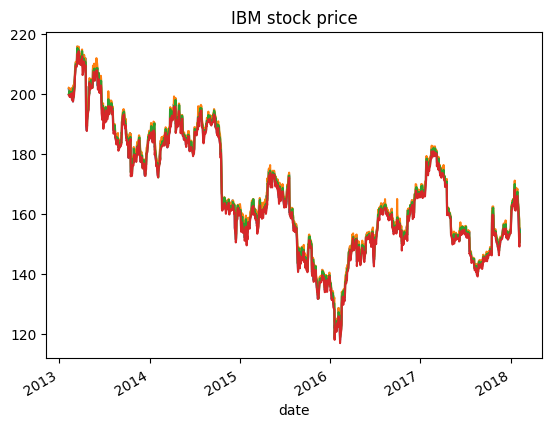

In [20]:
df.index = pd.to_datetime(df.index)

# df.plot(x=0, y='close', title='IBM stock price')
# df.plot(x=0, y='high', title='IBM stock price')
# df.plot(x=0, y='open', title='IBM stock price')
# df.plot(x=0, y='low', title='IBM stock price')

df['close'].plot(title='IBM stock price')
df['high'].plot(title='IBM stock price')
df['open'].plot(title='IBM stock price')
df['low'].plot(title='IBM stock price')

plt.show()

Die obigen Kurse sind fast ident zu allen Zeitpunkten. Die Kurven überlagern sich und sie weichen nur minimal voneinander ab.

### Modelliere den Rolling Mean = Moving Average jeder dieser 4 Zeitreihen und stelle diese graphisch jeweils in Kombination mit der ursprünglichen Zeitreihe dar.

In [49]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict


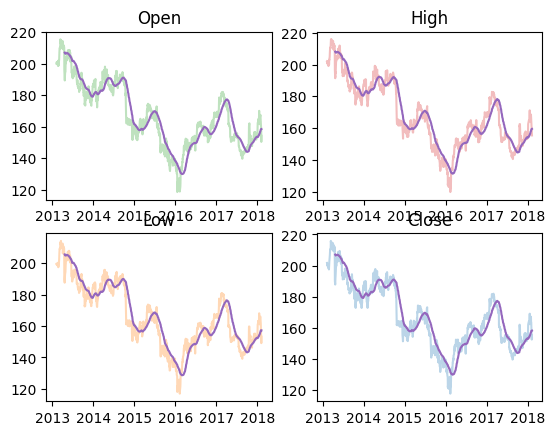

In [50]:
fig, ax = plt.subplots(2, 2)
ax[0, 0].set_title('Open')
ax[0, 0].plot(df['open'], 'tab:green', alpha=0.3)
ax[0, 0].plot(df['open'].rolling(50).mean().dropna(), 'tab:purple')
ax[0, 1].set_title('High')
ax[0, 1].plot(df['high'], 'tab:red', alpha=0.3)
ax[0, 1].plot(df['high'].rolling(50).mean().dropna(), 'tab:purple')
ax[1, 0].set_title('Low')
ax[1, 0].plot(df['low'], 'tab:orange', alpha=0.3)
ax[1, 0].plot(df['low'].rolling(50).mean().dropna(), 'tab:purple')
ax[1, 1].set_title('Close')
ax[1, 1].plot(df['close'], 'tab:blue', alpha=0.3)
ax[1, 1].plot(df['close'].rolling(50).mean().dropna(), 'tab:purple')
plt.show()

### Stelle die Autokorrelation und partielle Autokorrelation der 4 Zeitreihen graphisch dar. Beschreibe, was dabei auffällt und wie diese Darstellungen und ihre Zeitreihen zusammenhängen.

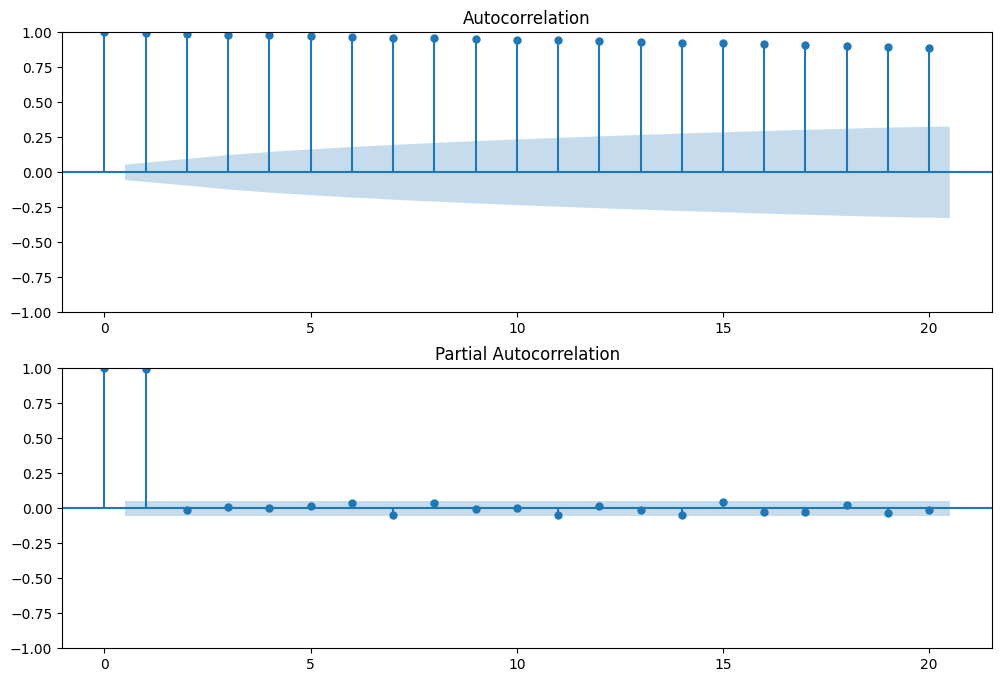

In [53]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))


ax1 = fig.add_subplot(211)
fig = plot_acf(df['open'], lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['open'],lags=20,ax=ax2)

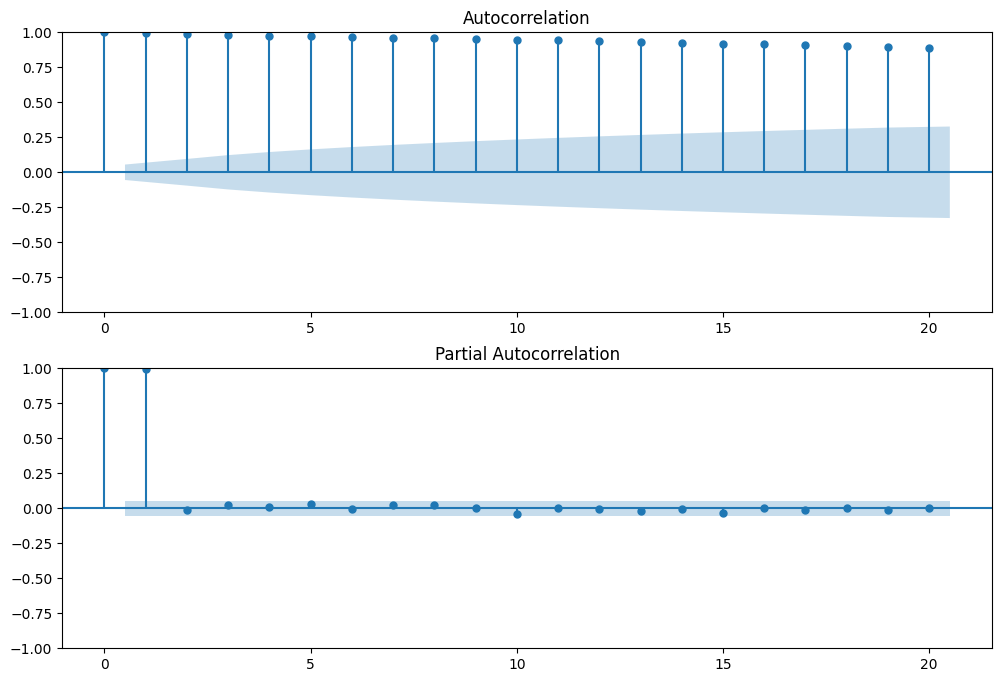

In [54]:
fig = plt.figure(figsize=(12,8))


ax1 = fig.add_subplot(211)
fig = plot_acf(df['close'], lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['close'],lags=20,ax=ax2)

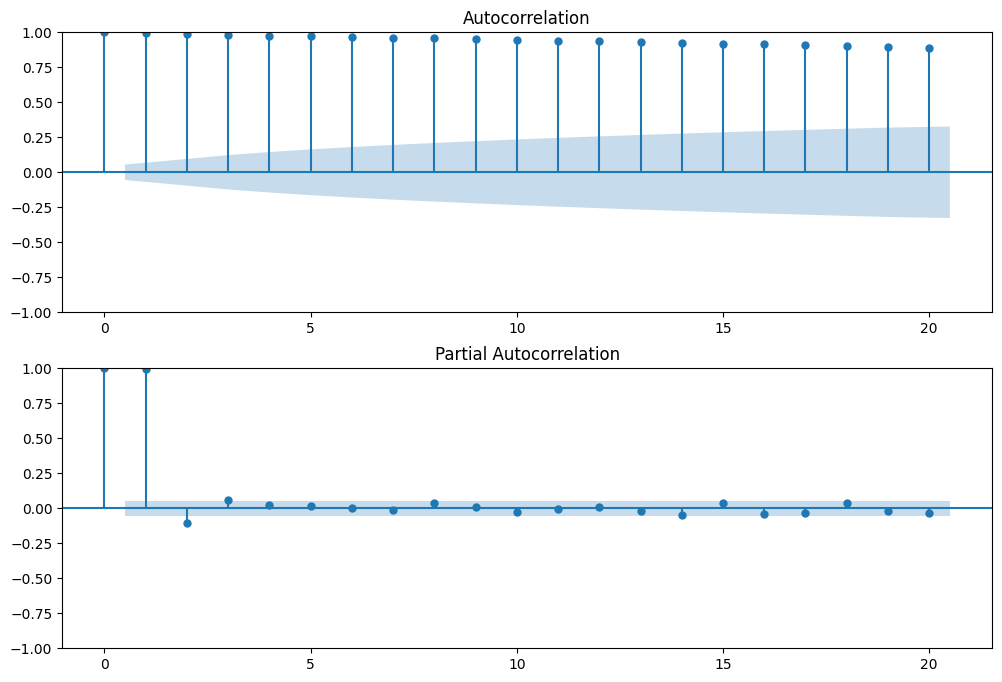

In [55]:
fig = plt.figure(figsize=(12,8))


ax1 = fig.add_subplot(211)
fig = plot_acf(df['low'], lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['low'],lags=20,ax=ax2)

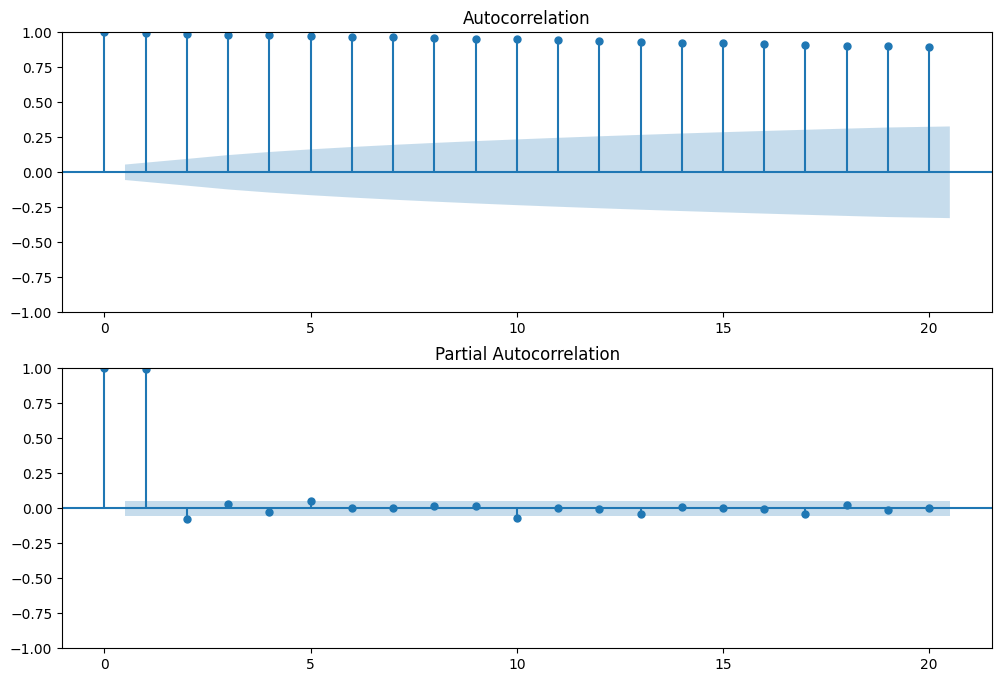

In [56]:
fig = plt.figure(figsize=(12,8))


ax1 = fig.add_subplot(211)
fig = plot_acf(df['high'], lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['high'],lags=20,ax=ax2)

Die Autokorrelation und die partielle Autokorrelation der Zeitreihen schauen alle sehr ähnlich aus. Generell kann man sagen, dass die Autokorrelation nur deswegen so stark ist, da die Variable zum Zeitpunkt t stark mit sich selber zum Zeitpunkt t-1 korreliert. Nimmt man diesen Zusammenhang weg (=Partielle Autokorrelation), so verschwindet dieser starke Zusammenhang mit sich selber plötzlich. Danach schwankt die Autokorrelation um 0, mit minimalen Ausreißern, wie z.B. bei Lag 2 im Tagenhöchstkurs.

### Passe für eine dieser Zeitreihen ein autoregressives Modell an, wobei du dafür die in den Autokorrelationsplots erkennbare Ordnung wählst. Interpretiere dieses Modell.

In [80]:
from statsmodels.tsa.ar_model import AutoReg

In [81]:
data = df['open']
# train, test = data[1:len(data)], data[len(data)-7:]

In [82]:
model = AutoReg(data, lags=1)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

Coefficients: const      0.855722
open.L1    0.994666
dtype: float64


/home/ben10/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [83]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                   open   No. Observations:                 1259
Model:                     AutoReg(1)   Log Likelihood               -2593.651
Method:               Conditional MLE   S.D. of innovations              1.902
Date:                Thu, 07 Mar 2024   AIC                           5193.303
Time:                        15:43:59   BIC                           5208.714
Sample:                             1   HQIC                          5199.095
                                 1259                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8557      0.448      1.912      0.056      -0.021       1.733
open.L1        0.9947      0.003    374.380      0.000       0.989       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0054           +0.0000j            1.0054            0.0000
-----------------------------------------------------------------------------
"""

Unser AR(x) Modell schaut nur einen Lag zurück, um den nächsten Lag vorherzusagen. Es wurden 1258 Beobachtungen verwendet, um dieses Modell zu erstellen. Der Achsenabschnitt beträgt zirka 0.87 bei einem std err von 0.448. 'k' beträgt hierbei 0.99 bei einem std err von 0.003. Die Lag-Größe ist statistisch signifikant mit einer P-Value Größe unter 0.00001. Die Konstante hat einen P-Value von 0.056.

### Sage anhand des Modells den Börsenkurs in den ersten 5 Tagen nach Ende der Zeitreihe vorher.

/tmp/ipykernel_6247/1361343046.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([df,future_dates_df])


<Axes: >

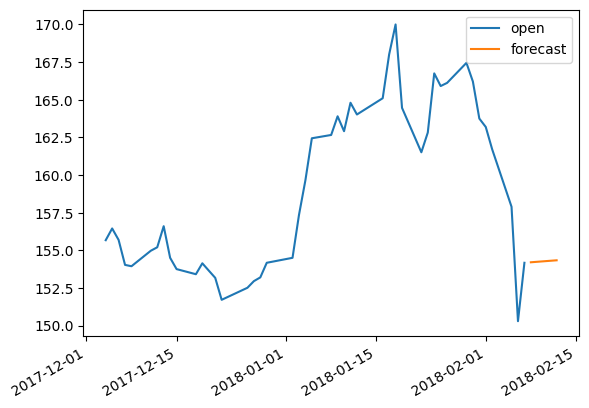

In [85]:
from pandas.tseries.offsets import DateOffset
from statsmodels.tsa.ar_model import AutoReg
X = df['open'].values
model = AutoReg(X, lags=1)
model_fit = model.fit()
model_fit.summary()

future_dates = [df.index[-1] + DateOffset(days=x) for x in range(0, 6)]
future_dates_df=pd.DataFrame(index=future_dates[1:],columns=['open'])
future_dates_df['forecast'] = model_fit.forecast(steps=5)
future_df=pd.concat([df,future_dates_df])
future_df[['open', 'forecast']].tail(n=50).plot()

In [86]:
model_fit.forecast(steps=5)

array([154.20332006, 154.23646239, 154.26942792, 154.30221759,
       154.33483236])

Laut unserer Vorhersage steigt der Kurs 